# Credit Card Fraud Detection

**Objective**:
To identify and predict fraudulent credit card transactions with the help of Data Analytices and Machine learning models.

**Data Preparation**:
->EDA: Data understanding, cleaning, univariate and bivariate analysis.
->Unnecessary columns are removed.

!pip install numpy
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install simple_colors     
!pip install chardet                   
!pip install -U seaborn 

In [1]:
## Importing all the necessary libraries

## To suppress warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
np.random.seed(0)   ## set random seed
import pandas as pd
import chardet
import os
import pickle
from collections import Counter
from math import sqrt

# For plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
import IPython

from imblearn.over_sampling import ADASYN #Adaptive Synthetic Oversampling
from collections import Counter
from scipy import stats

# sklearn packages (for pre-processing, model-building, evaluators, cross-validators, etc.)
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import PolynomialFeatures, PowerTransformer
from sklearn import preprocessing

import sklearn.utils
from sklearn.preprocessing import RobustScaler #Scaling the features

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc
from sklearn.model_selection import GridSearchCV #hyperparameter tuning
from sklearn.decomposition import PCA

#Neural Networks implementation
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.utils.vis_utils import plot_model


## for bold text
from simple_colors import *

## time and datetime
import datetime
import time

## Data Pre-processing and Analysis

### Reading the dataset

In [2]:
## Read the dataset: 'creditcard.csv' 
df = pd.read_csv(r"C:\Users\Shreepathi\Desktop\MI_Project\creditcard.csv\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Note**:

The dataset contains transactions made by credit cards in September 2013 by european cardholders, it would be safe to assume the default Currency for 'Amount' feature as **EURO** (EUR) i.e. **€** .

In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


### Data Understanding, Cleaning and Manipulation

In [4]:
df.shape

(284807, 31)

In [5]:
df= df.rename(columns=lambda x: x.strip())   ##Removing whitespaces in column names (if any)
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**Observations**:

(i) The Column (V1, V2, V3, up to V28) are the principal components (numerical input components) obtained using PCA.

(ii) The Column 'Time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions.

(iii) The Column 'Amount' is the transaction amount.

(iv) The Column 'Class' represents class labelling. (0: Normal Transactions[-ve Class], 1: Fraud Transactions[+ve Class]).


In [7]:
# Statistics summary
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
## Observing distribution of classes (0: Normal Transactions, 1: Fraud Transactions)

classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100

pattern_line= "*"*80
print(f"{pattern_line}\n{pattern_line}\n"+ \
      black("Distribution of Classes: (0: Normal Transactions, 1: Fraud Transactions)\n",'bold')+ \
      f"{classes}\n\n{pattern_line}")

print(black(f"Percentage of Normal Share i.e. Non-Fraudulent Transactions(%):\n",'bold')+ \
      f"{round(normal_share,4)} %"+ f"\n\n{pattern_line}")

print(black(f"Percentage of Fraud Share i.e. Fraudulent Transactions(%):\n",'bold')+ \
      f"{round(fraud_share,4)} %"+ f"\n\n{pattern_line}")

********************************************************************************
********************************************************************************
Distribution of Classes: (0: Normal Transactions, 1: Fraud Transactions)
0    284315
1       492
Name: Class, dtype: int64

********************************************************************************
Percentage of Normal Share i.e. Non-Fraudulent Transactions(%):
99.8273 %

********************************************************************************
Percentage of Fraud Share i.e. Fraudulent Transactions(%):
0.1727 %

********************************************************************************


**Observation**:

Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced (which has to be taken care during training a model), with the positive class (frauds) accounting for approximately 0.172% of the total transactions.

In [9]:
## Let's find the maximum transaction amount in Fraud Cases (Class Label: 1).
max_trnsctn_fraud= df[df.Class==1]["Amount"].max()
print(f"Maximum fraud transaction amount: €{max_trnsctn_fraud}")

Maximum fraud transaction amount: €2125.87


In [10]:
## Statistical summary of 'Amount' feature for different classes
summary_class_0= df[df.Class==0].Amount.describe([0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
print(black(f"Statistical summary of 'Amount' feature (Normal Transactions):\n\n",'bold'),summary_class_0)

summary_class_1= df[df.Class==1].Amount.describe([0.1,0.25,0.5,0.75,0.9,0.95,0.99,1])
print(black(f"\nStatistical summary of 'Amount' feature (Fraud Transactions):\n\n",'bold'),summary_class_1)

Statistical summary of 'Amount' feature (Normal Transactions):

 count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
10%           1.000000
25%           5.650000
50%          22.000000
75%          77.050000
90%         202.724000
95%         364.409000
99%        1016.966400
100%      25691.160000
max       25691.160000
Name: Amount, dtype: float64

Statistical summary of 'Amount' feature (Fraud Transactions):

 count     492.000000
mean      122.211321
std       256.683288
min         0.000000
10%         0.760000
25%         1.000000
50%         9.250000
75%       105.890000
90%       346.746000
95%       640.905000
99%      1357.427900
100%     2125.870000
max      2125.870000
Name: Amount, dtype: float64


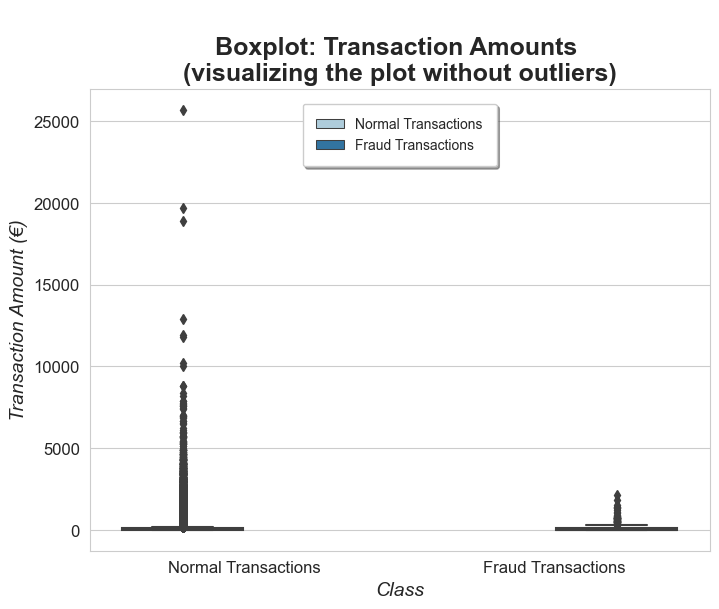

In [11]:
## Visualising the statistics of transaction amounts
plt.figure(figsize=(8,6), dpi=100)
sns.set_style("whitegrid")

ax_31= sns.boxplot(data=df, y="Amount", x="Class", hue="Class",showfliers=True, palette=("Paired")) 
ax_31.set_xticklabels(labels=['Normal Transactions','Fraud Transactions'], fontsize=12)
plt.title(f"\nBoxplot: Transaction Amounts \n(visualizing the plot with outliers)", fontsize=18, fontweight='bold')
plt.ylabel("Transaction Amount (€)", fontsize=14, fontstyle='italic')
plt.xlabel("Class", fontsize=14, fontstyle='italic')
plt.yticks(fontsize=12)

#legend
L31= ax_31.legend(loc='center', bbox_to_anchor=(0.5, 0.90), fancybox=True, shadow=True, borderpad=1)
L31.get_texts()[0].set_text('Normal Transactions')
L31.get_texts()[1].set_text('Fraud Transactions')

plt.show()


**Note**:

In the above boxplot, we have eliminated the effect of outliers in the transaction amounts. This helps us in better understanding the range of most of the values.

**Observations**:

(i) From the plot of distribution of classes with respect to transaction amount, it is quite evident that the <i>transaction amounts for fraud cases were lesser than approximately €2200.</i>

(ii) Precisely, average fraud transaction amount is approximately €122 (from statistical summary) and maximum fraud transaction amount is €2125.87.

(iii) Normal transactions have a wide-range of amounts with certain outliers (as seen from the plot of Distribution of Class with Amount).

In [12]:
#dropping Time because it does not give any valuable information
df = df.drop("Time", axis = 1)
df.shape

(284807, 30)

### Correlation Analysis

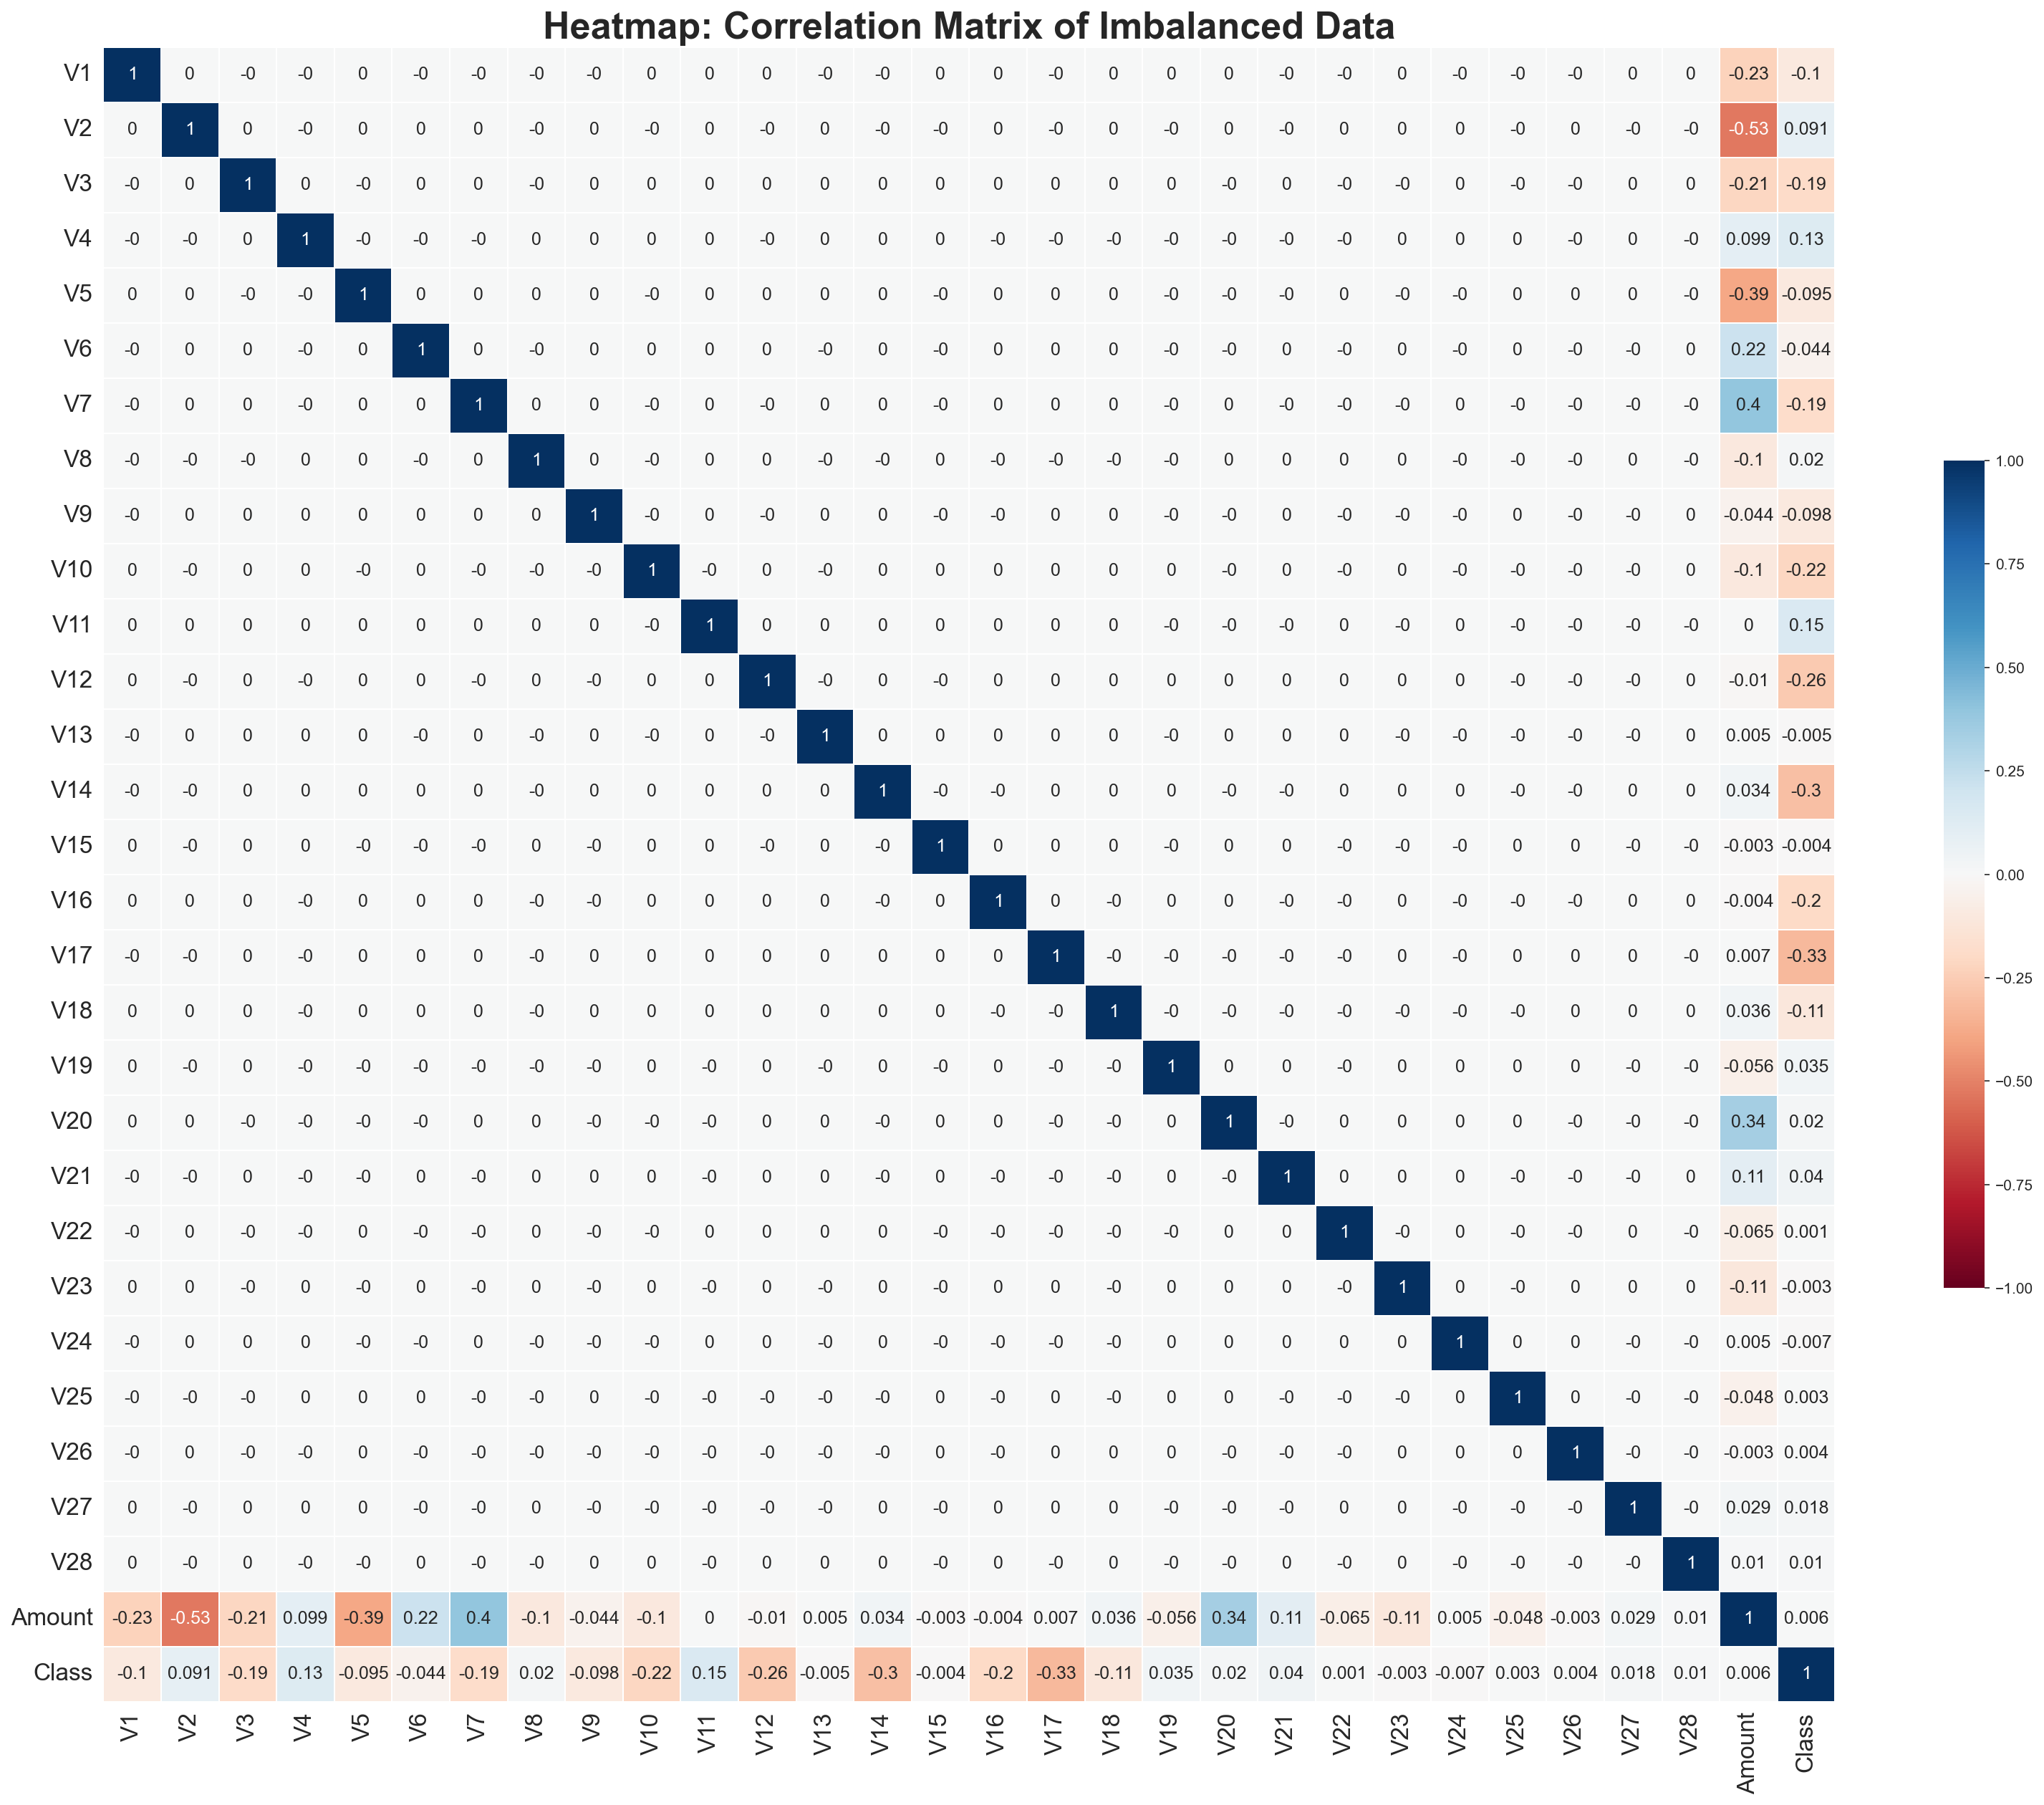

In [13]:
#### Let's check the correlation between all the feature variables to see if there is pattern between variables

#Plotting a heatmap to understand the correlation between the independent variables
corr_matrix = df.corr()
corr_matrix_round= round(corr_matrix, 3)
f, ax_corr = plt.subplots(figsize=(26,20), dpi=150)
ax_corr = sns.heatmap(corr_matrix_round,annot=True,cmap="RdBu", cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,\
             linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16, rotation=0)
plt.title("Heatmap: Correlation Matrix of Imbalanced Data", fontsize=25, fontweight='bold')
plt.show()

**Observations**:

(i) PCA components (V1, V2 upto V28) clearly don't show any sign of multi-collinearity with each other.

(ii) Some degree of correlation can be seen between PCA Components and the 'Class' feature. This can be clearly analysed after        balancing data .

In [14]:
#Standardizing the Amount column (All other 'V' columns are already scaled as they've undergone PCA transformation).
Rob_scaler=RobustScaler() #Robust to outliers
df['Std_Amount'] = Rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Std_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.670579


In [15]:
#drop Amount and move Std_Amount at index '0'
df = df.drop('Amount',axis=1)

Std_Amount = df['Std_Amount']
df.drop('Std_Amount', axis=1, inplace=True)
df.insert(0, 'Std_Amount', Std_Amount)
df.head()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


### Splitting the data into train & test data

In [16]:
#Splitting data before sampling
#Splitting data into train and test set in 80% and 20% respectively, using Stratified Shuffle Split

X = df.drop('Class', axis=1)
Y = df['Class']

sss1 = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42) #note the change in the code

for train_index1, test_index in sss1.split(X, Y):
    print("Train:", train_index1, "Test:", test_index)
    Xtrain, Xtest = X.iloc[train_index1], X.iloc[test_index]
    Ytrain, Ytest = Y.iloc[train_index1], Y.iloc[test_index]

#Splitting the train set further into train and validation set, which leaves train set 60% of the originial dataset and, test and validation sets 20% each respectively.
sss2 = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)

for train_index2, val_index in sss2.split(Xtrain, Ytrain):
    print("Train:", train_index2, "Validation:", val_index)
    Xtrain_final, Xval = X.iloc[train_index2], X.iloc[val_index]
    Ytrain_final, Yval = Y.iloc[train_index2], Y.iloc[val_index]

Train: [265518 180305  42664 ...  29062  13766  17677] Test: [263020  11378 147283 ... 274532 269819  64170]
Train: [ 72227 114282  16818 ... 264471 191914 284017] Test: [202638  32978 128121 ... 244024 127667  48318]
Train: [ 20895 114622 167683 ... 244502 178972 218506] Test: [284352  82483  90981 ... 171224 168807 271602]
Train: [122248 181660 194400 ... 104631 277586  29432] Test: [225673  63348  68025 ... 279451  77554  76043]
Train: [241684 223467 136928 ...  86495 160550  49633] Test: [157557 204860  83760 ... 251478 178967 216850]
Train: [186996 144807  69756 ... 195673 152135 100500] Validation: [214502 127768  18878 ...  45194 143895 114668]
Train: [203609 160516 170008 ... 168236  40608 156569] Validation: [152253  33885 217198 ... 219379 125093 195120]
Train: [166473 135845 190847 ... 114436 217810 119523] Validation: [135986 136793 153361 ... 221564 222657 122137]
Train: [ 16294 187750  97608 ... 157188 191303 201639] Validation: [125168  42557 218854 ... 117014  95701  40

Datasets created after splitting are:

Train Dataset: Xtrain_final, Ytrain_final

Test Dataset: Xtest, Ytest

Validation Dataset: Xval, Yval

In [17]:
# Check if the labels are distributed equally in all the datasets after splitting
train_unique_label, train_counts_label = np.unique(Ytrain_final, return_counts=True)
test_unique_label, test_counts_label = np.unique(Ytest, return_counts=True)
val_unique_label, val_counts_label = np.unique(Yval, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(Ytrain_final))
print(test_counts_label/ len(Ytest))
print(val_counts_label/ len(Yval))

Label Distributions: 

[0.99807471 0.00192529]
[0.99827955 0.00172045]
[0.99845511 0.00154489]


In [18]:
#Dimensionality of the datasets retrieved after splitting
print(Xtrain_final.shape)
print(Ytrain_final.shape)
print(Xtest.shape)
print(Ytest.shape)
print(Xval.shape)
print(Yval.shape)

(170883, 29)
(170883,)
(56962, 29)
(56962,)
(56962, 29)
(56962,)


In [19]:
#Checking number of instances for each class in the train dataset
print(Ytrain_final.value_counts())

0    170554
1       329
Name: Class, dtype: int64


In [20]:
#Converting test and validation dataframes in numpy arrays
Xval_arr=Xval.values
Yval_arr=Yval.values
Xtest_arr=Xtest.values
Ytest_arr=Ytest.values

In [21]:
#Using ADASYN for Oversampling
ada = ADASYN(sampling_strategy='minority', random_state=42) #note change in the code
 
#Oversampling is applied only on the training set
X_adasampled, Y_adasampled = ada.fit_resample(Xtrain_final, Ytrain_final)
print('Resampled dataset shape %s' % Counter(Y_adasampled))
print('Shape of X_adasampled: {}'.format(X_adasampled.shape))
print('Shape of Y_adasampled: {}'.format(Y_adasampled.shape))

Resampled dataset shape Counter({1: 170555, 0: 170554})
Shape of X_adasampled: (341109, 29)
Shape of Y_adasampled: (341109,)


In [22]:
#check the disribution of both the labels
train_label, train_count = np.unique(Y_adasampled, return_counts=True)
print('Label Distributions: \n')
print(train_count/ len(Y_adasampled))

Label Distributions: 

[0.49999853 0.50000147]


X_adasampled and Y_adasampled are the balanced train sets resulted after using OverSampling. These are ndarrays. In order to visualize a correlation matrix, they are converted to a dataframe and joined to form a single dataframe in the below series of blocks.

In [23]:
print(type(X_adasampled))
print(type(Y_adasampled))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
Xsm_train_df = pd.DataFrame(X_adasampled)
Xsm_train_df.columns = Xtrain.columns
Ysm_train_df = pd.DataFrame(Y_adasampled)
Ysm_train_df = Ysm_train_df.rename(columns={0: 'Class'})
print(Xsm_train_df.head())
print(Ysm_train_df.head())

   Std_Amount        V1        V2        V3        V4        V5        V6  \
0   -0.286173 -0.313555  0.586734  3.039981  2.848687 -0.158865  0.838171   
1    0.237546  1.883183 -0.640580  0.094691  0.386752 -0.859323  0.238667   
2    1.170265 -5.593796 -3.140554 -0.055757  1.539374  1.321195  1.449076   
3   -0.267729 -0.851124  0.819195  2.014788 -0.634556 -0.166583  0.779931   
4    1.369384 -1.339343  0.842304  2.210153  3.009876 -0.501056  1.506612   

         V7        V8        V9  ...       V19       V20       V21       V22  \
0 -0.305911  0.136755  1.081775  ...  0.211776  0.064667 -0.064730  0.538368   
1 -1.172713  0.238254  2.560352  ... -0.228614 -0.191241 -0.063316  0.025427   
2  0.494910 -0.187489  1.098618  ...  0.313058 -3.165442 -0.732926  1.617461   
3 -0.248282  0.440142  1.000038  ...  0.608179  0.309633  0.133497  0.615617   
4  0.044767  0.574622 -0.545759  ...  1.033634  0.245178 -0.188658 -0.159114   

        V23       V24       V25       V26       V27     

In [25]:
#Merging the Xsm_train_df and Ysm_train_df based on the index values to get a single dataframe in order to visualize a correlation matrix
new_df= pd.merge(Xsm_train_df, Ysm_train_df, how='inner', left_index=True, right_index=True)
new_df.tail()

,Std_Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
341104,-0.302153,0.612216,1.136698,-0.154166,2.734903,1.336005,0.215108,0.943778,-0.046963,-1.442687,...,-0.240076,0.039975,0.203574,0.051728,0.305006,-0.452393,-0.178964,0.074513,0.074057,1
341105,-0.230464,-0.519383,1.385562,0.752368,1.974297,1.219325,-0.505694,0.975950,-0.037102,-1.390557,...,-0.267351,-0.031952,-0.150567,-0.022797,0.277672,-0.525702,-0.328800,0.050264,0.140594,1
341106,-0.272124,0.009686,1.379178,0.080335,2.424228,1.521458,-0.177506,1.148691,-0.090568,-1.555827,...,-0.265918,0.042515,0.131816,0.017213,0.344725,-0.633475,-0.260628,0.072927,0.115886,1
341107,-0.290799,0.945468,0.624913,0.568505,2.582821,0.383164,0.462539,0.185534,0.144941,-0.896225,...,-0.186909,-0.101678,-0.157893,0.053072,0.096647,0.135599,-0.127333,0.036496,0.028940,1
341108,-0.298944,0.706420,0.992026,0.050119,2.691912,1.066656,0.285052,0.729437,0.007285,-1.288213,...,-0.225047,-0.000067,0.101394,0.052108,0.246107,-0.286179,-0.164369,0.063767,0.061303,1


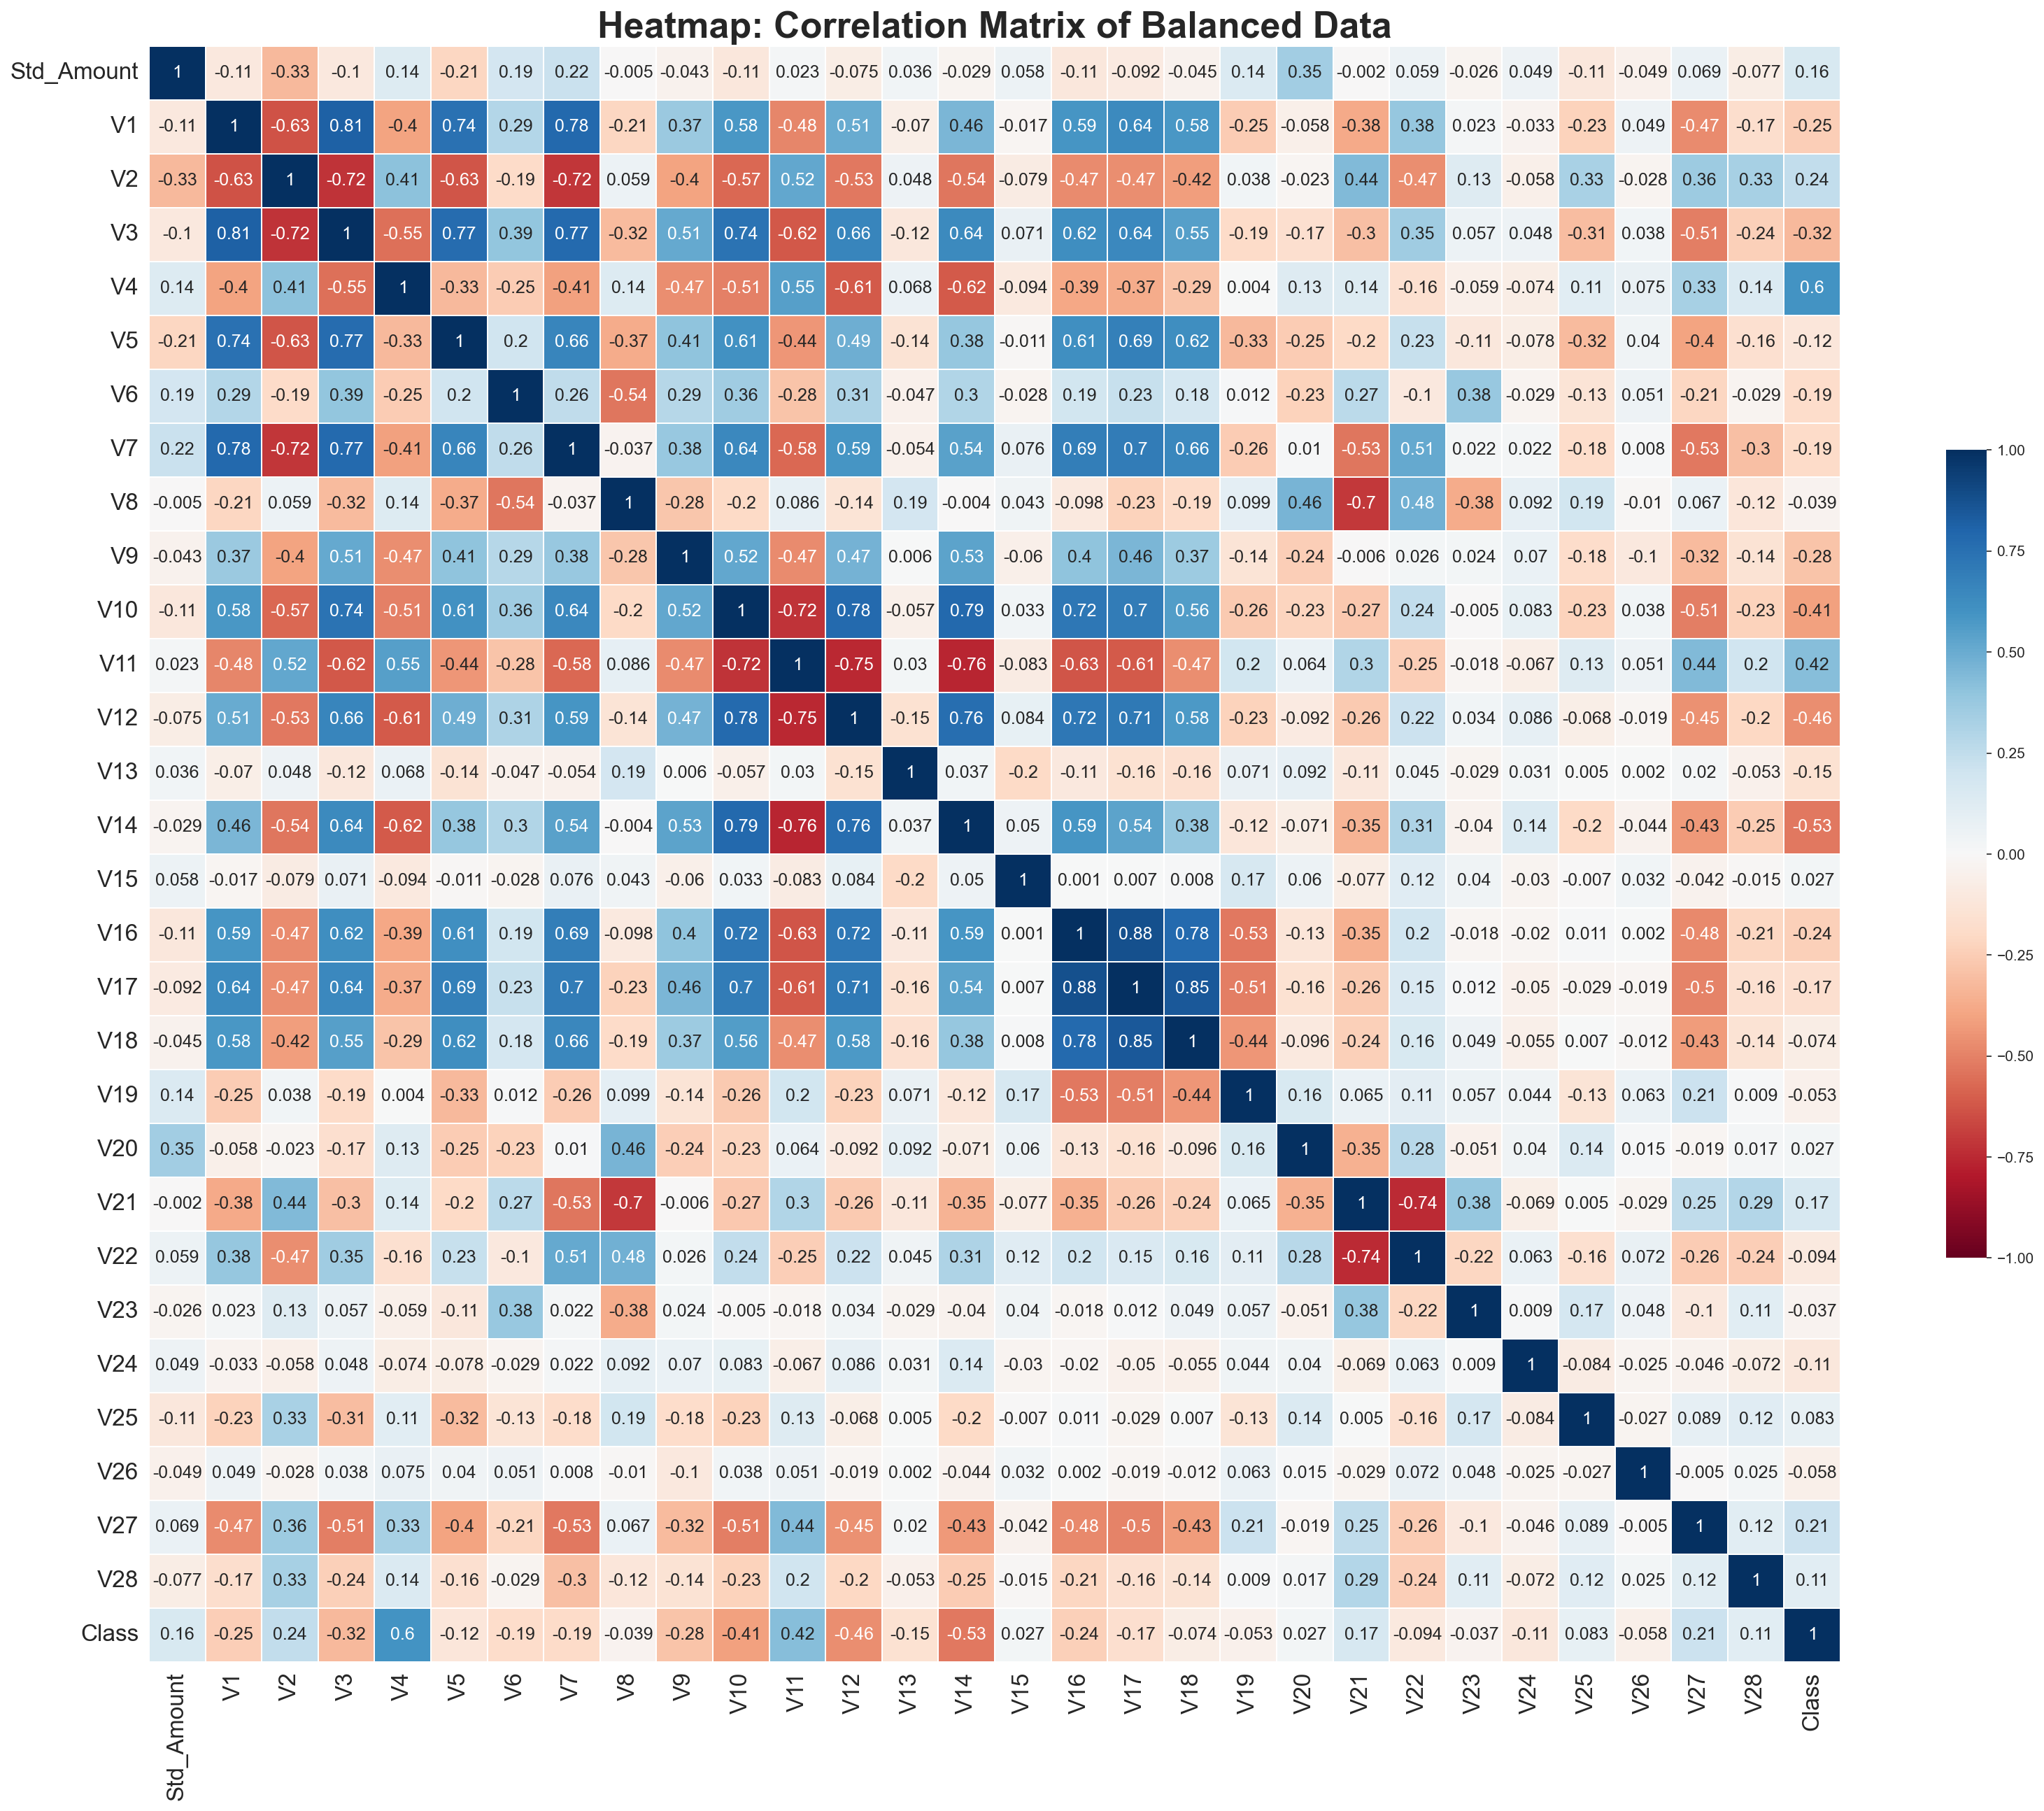

In [26]:
#Plotting a heatmap to understand the correlation between the independent variables
#checking correlation between features on the balanced dataset

corr = new_df.corr()
corr_2_round = round(corr, 3)
f, ax1 = plt.subplots(figsize=(26,20), dpi=150)
ax1 = sns.heatmap(corr_2_round, annot=True,cmap="RdBu", cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,\
             linewidths=0.01, annot_kws={"size":12})
plt.xticks(fontsize=16, rotation=90)
plt.yticks(fontsize=16, rotation=0)
plt.title("Heatmap: Correlation Matrix of Balanced Data", fontsize=25, fontweight='bold')
plt.show()

Negative and Positive Correlations can be seen in the matrix above:

Features, V14, V12, V10 and V3 show negative correlation towards the 'Class', As, lower are these values, more likely the transaction is Fraud.

Features V4, V11, V2 and V19 show positive correlation. As, higher are these values, more likely the transaction is Fraud.

# IMPLEMENTATION

##model 2

In [27]:
#function for confusion matrix
def conf_matrix(predicted_values):
    Predictions_CM = confusion_matrix(Ytest_arr, predicted_values, labels = [0, 1])
    class_feat=df['Class'].copy()
    class_feat= class_feat.unique()
    fig, ax = plt.subplots(figsize=(5,5))
    sns.heatmap(Predictions_CM, annot=True, fmt='d', xticklabels=class_feat, yticklabels=class_feat)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    plt.show()

In [28]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset without using dropout and, using the parameters tuned above.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True) #checks for decent = to zero 
#Model Creation
Model1 = Sequential()
Model1.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

#Compile Model
Model1.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
Model1.summary()

#Fit Model
history1= Model1.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=30, callbacks=[es], shuffle=True, verbose=2)
print(history1.history.keys())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 65)                1950      
                                                                 
 dense_1 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
488/488 - 2s - loss: 0.0666 - accuracy: 0.9798 - val_loss: 0.0186 - val_accuracy: 0.9943 - 2s/epoch - 3ms/step
Epoch 2/30
488/488 - 1s - loss: 0.0110 - accuracy: 0.9977 - val_loss: 0.0125 - val_accuracy: 0.9970 - 755ms/epoch - 2ms/step
Epoch 3/30
488/488 - 1s - loss: 0.0070 - accuracy: 0.9986 - val_loss: 0.0140 - val_accuracy: 0.9967 - 830ms/epoch - 2ms/step
Epoch 4/30
488/488 - 1s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0089 -

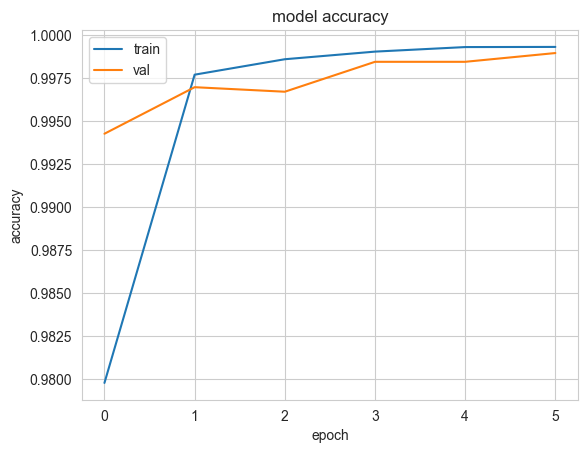

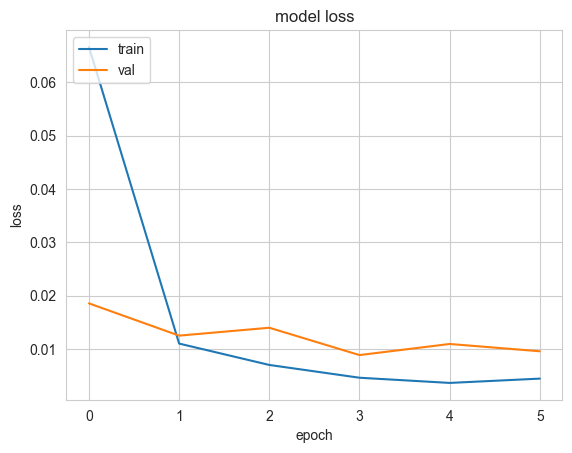

In [29]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

The variation in the performance of the train and validation data shows that it has been overlearned on the train dataset. So, let's try adding Dropout and see it's effect on the performance of the model.

In [30]:
#Training a Multi-layer perceptron with 1 hidden layer on Oversampled dataset using the parameters tuned above and adding a Dropout.
n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model1_drop = Sequential()
Model1_drop.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model1_drop.add(Dropout(0.5))
Model1_drop.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model1_drop.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
Model1_drop.summary()

history2= Model1_drop.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(history2.history.keys())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 65)                1950      
                                                                 
 dropout (Dropout)           (None, 65)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 66        
                                                                 
Total params: 2,016
Trainable params: 2,016
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
488/488 - 2s - loss: 0.3347 - accuracy: 0.8634 - val_loss: 0.1369 - val_accuracy: 0.9567 - 2s/epoch - 3ms/step
Epoch 2/40
488/488 - 1s - loss: 0.1354 - accuracy: 0.9564 - val_loss: 0.0807 - val_accuracy: 0.9717 - 942ms/epoch - 2ms/step
Epoch 3/40
488/488 - 1s - loss: 0.0905 - accuracy: 0.9750 - val_loss:

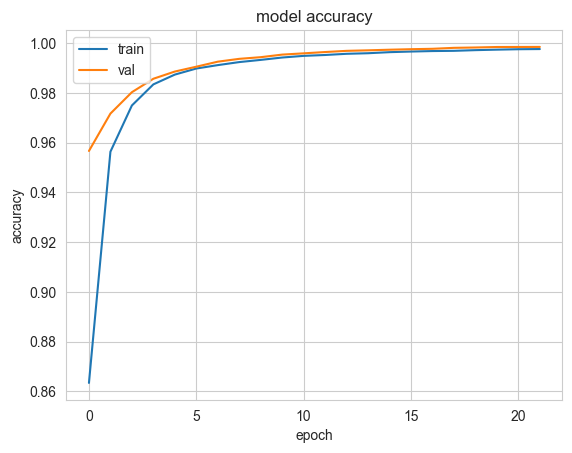

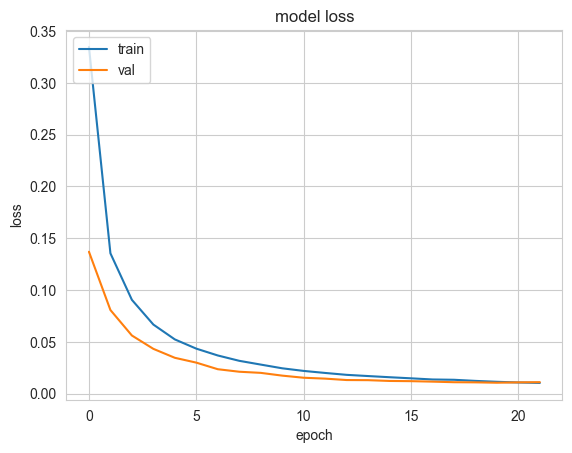

In [31]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

As observed, with the addition of Dropout, the validation dataset performs better. And the train and vaidation set performance is comparable.

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0072 - accuracy: 0.9985
Accuracy Model1 (Dropout):  0.9985429048538208
Recall_score: 0.9489795918367347
Precision_score: 0.543859649122807
F-score: 0.6914498141263942


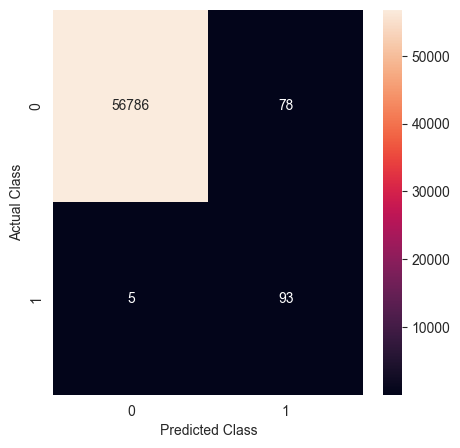

In [32]:
Y_pred_cls =(Model1_drop.predict(Xtest) > 0.5).astype("int32")
print('Accuracy Model1 (Dropout): ', Model1_drop.evaluate(Xtest_arr,Ytest_arr)[1])
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_pred_cls)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_pred_cls)))
conf_matrix(Y_pred_cls)

ROC curves are generally not well suited for imbalanced datasets, as they make use of True Negative. Thus, they can be deceptive. In contrast, TN are not considered in the Pression Recall-curve. Hence, they are more suitable for an imbalanced classification.

1781/1781 [==============================] - 1s 592us/step


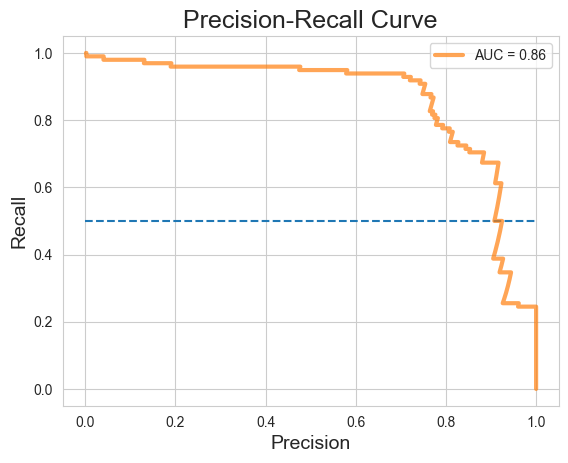

In [34]:
#Calculating Precision and Recall for various thresholds
Y_pred_prob = Model1_drop.predict(Xtest_arr).ravel()
precision, recall, thresholds_pr = precision_recall_curve(Ytest_arr, Y_pred_prob)

#Auc for PR curve
AUC_PRcurve= auc(recall, precision)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [43]:
#Training Multi-layer Perceptron with single hidden layer for 15 iterations and, appending the F-score for each iteration.
f_scorelist1=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,30):
    First_Model = Sequential()
    First_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    First_Model.add(Dropout(0.5))
    First_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    First_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
    First_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_first_pred = (First_Model.predict(Xtest_arr) > 0.5).astype("int32")
    
    f_score= f1_score(Ytest_arr,Y_first_pred)
    f_scorelist1.append(f_score)

print(f_scorelist1)
print('FScore Mean: '+ str(np.mean(f_scorelist1)))
print('-'*88)

1781/1781 [==============================] - 1s 580us/step
[0.6204620462046205, 0.7258687258687259, 0.7272727272727273, 0.636986301369863, 0.5974842767295597, 0.6440677966101696, 0.6109324758842444, 0.6738351254480287, 0.6462585034013605, 0.5900621118012422, 0.6573426573426573, 0.6216216216216216, 0.6305084745762712, 0.6714285714285715, 0.6737588652482269, 0.6992481203007519, 0.6084142394822006, 0.6666666666666667, 0.643598615916955, 0.636986301369863, 0.6690391459074733, 0.6348122866894198, 0.6378737541528239, 0.6348122866894198, 0.6715328467153285, 0.6372881355932204, 0.6527777777777778, 0.6619217081850535, 0.6266666666666667, 0.6283783783783784]
FScore Mean: 0.647930240376663
----------------------------------------------------------------------------------------


##Model 2

In [36]:
#Training Multi-layer perceptron with 2 hidden layers with dropout
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
Model2.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=2)
print(his_mod2.history.keys())

Epoch 1/40
488/488 - 2s - loss: 0.4880 - accuracy: 0.8302 - val_loss: 0.1367 - val_accuracy: 0.9528 - 2s/epoch - 4ms/step
Epoch 2/40
488/488 - 1s - loss: 0.1596 - accuracy: 0.9440 - val_loss: 0.0662 - val_accuracy: 0.9758 - 1s/epoch - 3ms/step
Epoch 3/40
488/488 - 1s - loss: 0.0883 - accuracy: 0.9750 - val_loss: 0.0316 - val_accuracy: 0.9897 - 1s/epoch - 3ms/step
Epoch 4/40
488/488 - 1s - loss: 0.0520 - accuracy: 0.9870 - val_loss: 0.0213 - val_accuracy: 0.9939 - 1s/epoch - 3ms/step
Epoch 5/40
488/488 - 1s - loss: 0.0359 - accuracy: 0.9915 - val_loss: 0.0182 - val_accuracy: 0.9958 - 1s/epoch - 3ms/step
Epoch 6/40
488/488 - 1s - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0141 - val_accuracy: 0.9972 - 1s/epoch - 3ms/step
Epoch 7/40
488/488 - 1s - loss: 0.0213 - accuracy: 0.9954 - val_loss: 0.0137 - val_accuracy: 0.9975 - 1s/epoch - 3ms/step
Epoch 8/40
488/488 - 1s - loss: 0.0181 - accuracy: 0.9962 - val_loss: 0.0133 - val_accuracy: 0.9979 - 1s/epoch - 3ms/step
Epoch 9/40
488/488 - 1s 

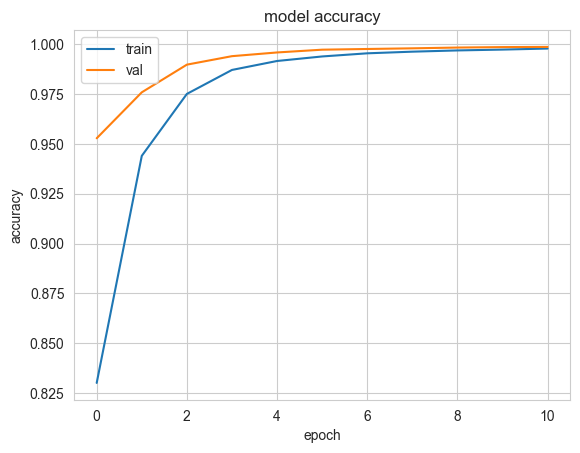

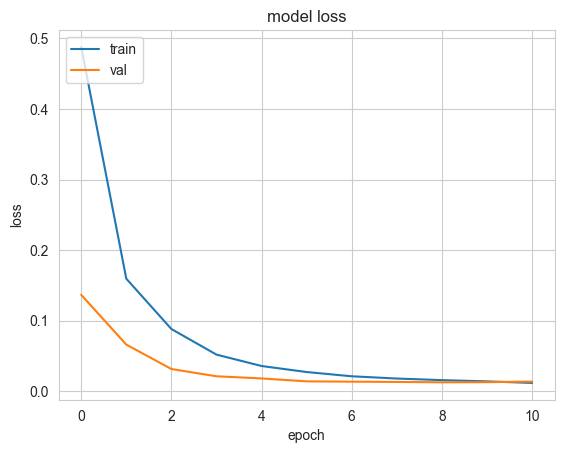

In [37]:
# summarize history for accuracy
plt.plot(his_mod2.history['accuracy'])
plt.plot(his_mod2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(his_mod2.history['loss'])
plt.plot(his_mod2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1781/1781 [==============================] - 1s 742us/step - loss: 0.0096 - accuracy: 0.9982
Accuracy MLP: 0.998191773891449
1781/1781 [==============================] - 1s 737us/step - loss: 0.0096 - accuracy: 0.9982
Loss value: 0.009644820354878902
1781/1781 [==============================] - 1s 570us/step
Recall_score: 0.9591836734693877
Precision_score: 0.48704663212435234
F-score: 0.6460481099656358


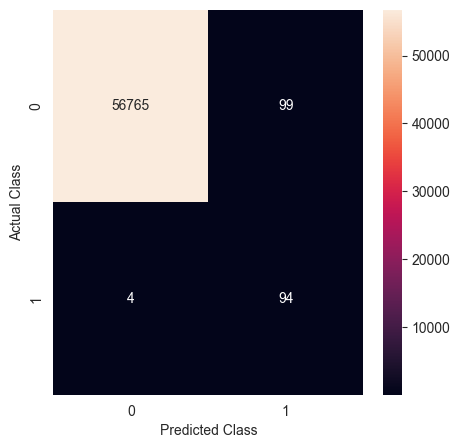

In [38]:
print('Accuracy MLP: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[1]))
print('Loss value: '+ str(Model2.evaluate(Xtest_arr,Ytest_arr)[0]))

Y_mod2_pred = (Model2.predict(Xtest_arr) > 0.5).astype("int32")
print('Recall_score: ' + str(recall_score(Ytest_arr,Y_mod2_pred)))
print('Precision_score: ' + str(precision_score(Ytest_arr, Y_mod2_pred)))
print('F-score: ' + str(f1_score(Ytest_arr,Y_mod2_pred)))
conf_matrix(Y_mod2_pred)

1781/1781 [==============================] - 1s 587us/step


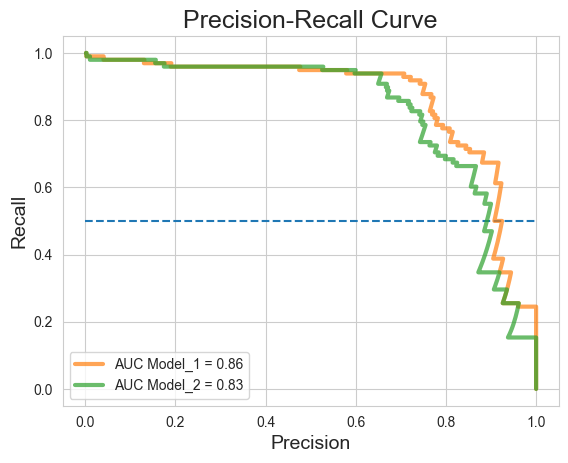

In [40]:
#Calculating Precision and Recall for various thresholds
Y_pred_prob2 = Model2.predict(Xtest_arr).ravel()
precision_2, recall_2, thresholds_pr_2 = precision_recall_curve(Ytest_arr, Y_pred_prob2)

#Auc for PR curve
AUC_PRcurve_2= auc(recall_2, precision_2)

plt.figure(1)
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
#plot PR curve
plt.plot(precision, recall, label = "AUC Model_1 = {:0.2f}".format(AUC_PRcurve), lw = 3, alpha = 0.7)
plt.plot(precision_2, recall_2, label = "AUC Model_2 = {:0.2f}".format(AUC_PRcurve_2), lw = 3, alpha = 0.7)
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [44]:
#Iterating Model-2 with 2 hidden layer for 60 iterations.

f_scorelist2=[]

n_inputs = X_adasampled.shape[1]
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='min', restore_best_weights= True)
for i in range(0,30):
    
    Second_Model = Sequential()
    Second_Model.add(Dense(65, input_shape=(n_inputs, ), kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(65, kernel_initializer='he_normal', activation='relu'))
    Second_Model.add(Dropout(0.5))
    Second_Model.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

    Second_Model.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    Second_Model.fit(X_adasampled, Y_adasampled, validation_data=(Xval_arr, Yval_arr), batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=0)
    Y_second_pred =(Second_Model.predict(Xtest) > 0.5).astype("int32")
    
    f_score= f1_score(Ytest_arr,Y_second_pred)
    f_scorelist2.append(f_score)

print(f_scorelist2)
print('FScore Mean: '+ str(np.mean(f_scorelist2)))
print('-'*88)

1781/1781 [==============================] - 2s 1ms/step
[0.6863468634686347, 0.6666666666666666, 0.6666666666666666, 0.5911949685534591, 0.6884057971014493, 0.627450980392157, 0.6460481099656358, 0.6031746031746033, 0.6643109540636042, 0.6245847176079734, 0.6619217081850535, 0.6911764705882353, 0.7014925373134329, 0.6209150326797386, 0.6596491228070176, 0.6550522648083624, 0.6351351351351352, 0.6291390728476821, 0.6761565836298933, 0.6738351254480287, 0.5925925925925926, 0.6760563380281689, 0.6438356164383561, 0.6618705035971222, 0.6643356643356644, 0.5974842767295597, 0.6909090909090909, 0.6416382252559727, 0.6550522648083624, 0.6787003610108303]
FScore Mean: 0.652393277160305
----------------------------------------------------------------------------------------


In [45]:
#Comparing the mean performance of the F-score for both the models
print('Model-1')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist1)))

print('-'*40)

print('Model-2')
print('---------')
print('Average F-Score: '+ str(np.mean(f_scorelist2)))

Model-1
---------
Average F-Score: 0.647930240376663
----------------------------------------
Model-2
---------
Average F-Score: 0.652393277160305
